*Note: This code was a team effort by Group 1.*

# **Mutlilevel Analysis**

In order to perform a multilevel analysis, the Pymer4 tool has been used, as proposed by Jolly (2018).

Reference:
Jolly, (2018). Pymer4: Connecting R and Python for Linear Mixed Modeling. Journal of Open Source Software, 3(31), 862, https://doi.org/10.21105/joss.00862

In [1]:
# import some basic libraries
import os
import pandas as pd

os.environ["R_HOME"] = "/Library/Frameworks/R.framework/Resources"

## **1. Preparing the data**

### 1.1 Combining all the new features and adding them to the original dataset

In [2]:
# Reading the main dataset that was created for our project
original_df = pd.read_csv('combined_themepark_dataset.csv')

# Reading the csv files that have been exported from the different hypotheses testing processes, including the new engineered features

H1_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H1_dataframe.csv')
H2_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H2_dataframe.csv')
H3_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H3_dataframe.csv')
H4_data = pd.read_csv('https://raw.githubusercontent.com/crlhbs/Group1_MarketingStrategy/main/02_new%20dataframes/H4_dataframe.csv')

In [3]:
# Merge the required columns from H2_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H2_data[['post_id', 'post_type']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1


In [4]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1


In [5]:
# Merge the required columns from H4_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H4_data[['post_id', 'has_emoji']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1,1


In [6]:
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,link_posts,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,NaN,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1,1


In [7]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H3_data[['post_id', 'sentiment']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,picture_posts,video_posts,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,1.0,NaN,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1,1,positive


In [8]:
# Merging the required columns from H3_data to original_df based on 'post_id'
original_df = pd.merge(original_df, H1_data[['post_id', 'day_of_week', 'time_of_day']], on='post_id', how='left')

# Display the first few rows of the merged DataFrame
original_df.head(1)

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1,1,positive,Sunday,Afternoon


### Checking, if the final combined dataframe looks fine

In [9]:
original_df

,date,profile,message,nr_reactions,nr_comments,nr_shares,comments/post,post_interaction_rate,engagement,nr_likes,...,profile_id,post_id,link,followers,weighted_engagement,post_type,has_emoji,sentiment,day_of_week,time_of_day
0,12/31/23 9:40 PM,wild adventures theme park,🎟️🚨 Today's the FINAL day to use your 2023 Sea...,16,2,2,2,NaN,1.090000e+12,13,...,84679583132,84679583132_770120045161180,https://www.facebook.com/617429960430190/posts...,low,23,1,1,positive,Sunday,Afternoon
1,12/31/23 8:01 PM,fun spot america,See you next year! 😉 Don’t miss...,38,1,2,1,NaN,4.170000e+11,33,...,"1,8402E+11",184020466977_767286052104076,https://www.facebook.com/653224623510220/posts...,medium,41,3,1,positive,Sunday,Afternoon
2,12/31/23 7:30 PM,fun spot america,Don't miss our HUGE firework display ! 🥳\n\n#f...,23,2,3,2,NaN,2.850000e+11,21,...,"1,8402E+11",184020466977_767267948772553,https://www.facebook.com/653224623510220/posts...,medium,34,2,1,positive,Sunday,Afternoon
3,12/31/23 7:00 PM,disneyland paris,Fijne jaarwisseling! 🥂🎉\nEn tot volgend jaar 😉,646,52,12,56,NaN,1.360000e+11,478,...,"6,52389E+14",652389081615295_775974521237956,https://www.facebook.com/724434559725286/posts...,high,618,1,1,neutral,Sunday,Evening
4,12/31/23 7:00 PM,silverwood theme park,It's the last day of our New Year's Sale! Save...,17,2,0,2,NaN,4.960000e+11,16,...,"7,62702E+14",762701550509617_678920137770716,https://www.facebook.com/562559642740100/posts...,medium,20,2,0,positive,Sunday,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18288,01/01/2023 02:00,wild adventures theme park,LAST CHANCE! \n\nPrices on 2023 Season Passes ...,20,1,0,2,NaN,1.250000e+11,20,...,84679583132,84679583132_10159284713193133,https://www.facebook.com/WildAdventures/photos...,low,22,1,0,positive,Saturday,Evening
18289,01/01/2023 01:20,playland,O Grupo Playcenter e os Parques Playcenter Fam...,7,1,0,1,NaN,2.460000e+09,7,...,"1,70866E+14",170865866397863_2401446080006486,https://www.facebook.com/170865866397863/posts...,low,9,1,1,neutral,Saturday,Evening
18290,01/01/2023 00:01,disneyland paris,Gelukkig 2023! Laat de magie dit jaar stralen ...,833,40,31,44,NaN,1.750000e+12,621,...,"6,52389E+14",652389081615295_2176203019233886,https://www.facebook.com/652389081615295/posts...,high,794,2,1,neutral,Sunday,Morning
18291,01/01/2023 00:00,six flags over georgia & hurricane harbor,What are your 2023 New Years resolutions? ✨\n\...,58,7,2,9,NaN,1.420000e+12,49,...,34284255238,34284255238_10160187479800239,https://www.facebook.com/sixflagsovergeorgia/p...,medium,69,1,1,positive,Saturday,Evening


# **2. Creating a multi-level model**

### 2.1 Setting up the model with the features from the hypotheses of this project

In [10]:
from pymer4.models import Lmer

In [11]:
# Define the formula for the multilevel regression model with varying slopes
#formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type + has_emoji + sentiment + day_of_week + time_of_day | followers)'

# Create an instance of the Lmer model
#model = Lmer(formula, data=original_df)

# Fit the model to the data
#model.fit()

In [12]:
# Define the formula for the multilevel regression model with varying slopes
#formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type + has_emoji + sentiment + day_of_week + time_of_day | followers)'

# Create an instance of the Lmer model
#model = Lmer(formula, data=original_df)

# Fit the model to the data
#model.fit()

In [13]:
# Define the formula for the multilevel regression model with varying slopes
formula = 'weighted_engagement ~ post_type + has_emoji + sentiment + day_of_week + time_of_day + (1 + post_type|followers) + (1 + has_emoji|followers) + (1 + sentiment|followers) + (1 + day_of_week|followers) + (1 + time_of_day|followers)'

# Create an instance of the Lmer model
model = Lmer(formula, data=original_df)

# Fit the model to the data
model.fit()

boundary (singular) fit: see help('isSingular') 

Linear mixed model fit by REML [’lmerMod’]
Formula: weighted_engagement~post_type+has_emoji+sentiment+day_of_week+time_of_day+(1+post_type|followers)+(1+has_emoji|followers)+(1+sentiment|followers)+(1+day_of_week|followers)+(1+time_of_day|followers)

Family: gaussian	 Inference: parametric

Number of observations: 18293	 Groups: {'followers': 3.0}

Log-likelihood: -177003.917 	 AIC: 354127.835

Random effects:

                             Name           Var       Std
followers             (Intercept)  2.127665e+03    46.127
followers               post_type  5.467303e+04   233.823
followers.1           (Intercept)  0.000000e+00     0.000
followers.1             has_emoji  4.280711e+04   206.899
followers.2           (Intercept)  2.676510e+04   163.600
followers.2      sentimentneutral  8.119184e+04   284.942
followers.2     sentimentpositive  4.533438e+04   212.919
followers.3           (Intercept)  3.526625e+05   593.854
followers.3  

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),309.676,-453.280,1072.633,389.271,1.202,0.796,0.553,
post_type,158.902,-121.686,439.489,143.160,1.904,1.110,0.388,
has_emoji,-100.781,-363.620,162.057,134.104,1.738,-0.752,0.541,
sentimentneutral,194.141,-225.128,613.410,213.917,1.763,0.908,0.471,
sentimentpositive,149.067,-195.288,493.422,175.694,1.970,0.848,0.487,
day_of_weekMonday,-56.297,-382.708,270.114,166.539,2.211,-0.338,0.765,
day_of_weekSaturday,-350.901,-1037.542,335.739,350.333,1.984,-1.002,0.423,
day_of_weekSunday,-107.654,-563.016,347.709,232.332,2.025,-0.463,0.688,
day_of_weekThursday,12.155,-166.480,190.789,91.142,244.645,0.133,0.894,
day_of_weekTuesday,-74.159,-444.683,296.366,189.047,2.121,-0.392,0.731,


In [14]:
# Extract fixed effects
fixed_effects = model.coefs

fixed_effects

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),309.676242,-453.280255,1072.632739,389.270672,1.202308,0.795529,0.553173,
post_type,158.901560,-121.685920,439.489039,143.159508,1.903583,1.109962,0.387534,
has_emoji,-100.781463,-363.620212,162.057285,134.103866,1.738009,-0.751518,0.540770,
sentimentneutral,194.140961,-225.128098,613.410021,213.916716,1.763383,0.907554,0.470727,
sentimentpositive,149.067260,-195.287584,493.422104,175.694475,1.970170,0.848446,0.486705,
day_of_weekMonday,-56.297458,-382.708463,270.113547,166.539287,2.211022,-0.338043,0.764766,
day_of_weekSaturday,-350.901472,-1037.542389,335.739444,350.333436,1.983625,-1.001621,0.422770,
day_of_weekSunday,-107.653530,-563.015836,347.708776,232.331976,2.024829,-0.463361,0.688148,
day_of_weekThursday,12.154557,-166.480078,190.789192,91.141795,244.645181,0.133359,0.894019,
day_of_weekTuesday,-74.158885,-444.683497,296.365727,189.046643,2.120731,-0.392278,0.730792,


In [15]:
# Get group level coefficients (just the first 5)
# Each row here is a unique intercept and slope
# which vary because we parameterized our rfx that way above
model.fixef.head(5)

,(Intercept),post_type,has_emoji,sentimentneutral,sentimentpositive,day_of_weekMonday,day_of_weekSaturday,day_of_weekSunday,day_of_weekThursday,day_of_weekTuesday,day_of_weekWednesday,time_of_dayEvening,time_of_dayMorning
high,59.848578,412.213878,-314.218754,448.708106,339.288937,-312.516336,-1007.830685,-504.676459,0.776919,-386.614259,10.424233,-125.807937,1071.685378
low,479.620951,-13.416681,-20.541158,65.242653,52.749842,76.083929,-11.483857,97.477515,18.033075,87.278385,10.255045,47.221727,-47.873552
medium,389.559198,77.907481,32.415522,68.472124,55.163003,67.540033,-33.389875,84.238355,17.653676,76.859220,10.258765,35.844919,25.738216


In [16]:
# Get population level coefficients
model.coefs

,Estimate,2.5_ci,97.5_ci,SE,DF,T-stat,P-val,Sig
(Intercept),309.676242,-453.280255,1072.632739,389.270672,1.202308,0.795529,0.553173,
post_type,158.901560,-121.685920,439.489039,143.159508,1.903583,1.109962,0.387534,
has_emoji,-100.781463,-363.620212,162.057285,134.103866,1.738009,-0.751518,0.540770,
sentimentneutral,194.140961,-225.128098,613.410021,213.916716,1.763383,0.907554,0.470727,
sentimentpositive,149.067260,-195.287584,493.422104,175.694475,1.970170,0.848446,0.486705,
day_of_weekMonday,-56.297458,-382.708463,270.113547,166.539287,2.211022,-0.338043,0.764766,
day_of_weekSaturday,-350.901472,-1037.542389,335.739444,350.333436,1.983625,-1.001621,0.422770,
day_of_weekSunday,-107.653530,-563.015836,347.708776,232.331976,2.024829,-0.463361,0.688148,
day_of_weekThursday,12.154557,-166.480078,190.789192,91.141795,244.645181,0.133359,0.894019,
day_of_weekTuesday,-74.158885,-444.683497,296.365727,189.046643,2.120731,-0.392278,0.730792,


### Get group level deviates from population level coefficients (i.e. rfx)

In [17]:
# Extract random effects
random_effects = model.ranef

random_effects

,X.Intercept.,post_type,X.Intercept..1,has_emoji,X.Intercept..2,sentimentneutral,sentimentpositive,X.Intercept..3,day_of_weekMonday,day_of_weekSaturday,day_of_weekSunday,day_of_weekThursday,day_of_weekTuesday,day_of_weekWednesday,X.Intercept..4,time_of_dayEvening,time_of_dayMorning
high,-49.965533,253.312319,0.0,-213.437290,-146.160699,254.567145,190.221676,671.974572,-256.218878,-656.929213,-397.022929,-11.377638,-312.455374,0.111552,0.0,-111.560840,721.835364
low,33.988942,-172.318240,0.0,80.240305,74.007447,-128.898308,-96.317419,-347.191146,132.381387,339.417615,205.131045,5.878519,161.437270,-0.057636,0.0,61.468824,-397.723566
medium,15.976591,-80.994078,0.0,133.196985,72.153252,-125.668837,-93.904257,-324.783425,123.837491,317.511598,191.891885,5.499119,151.018104,-0.053916,0.0,50.092016,-324.111798


<Axes: xlabel='Estimate'>

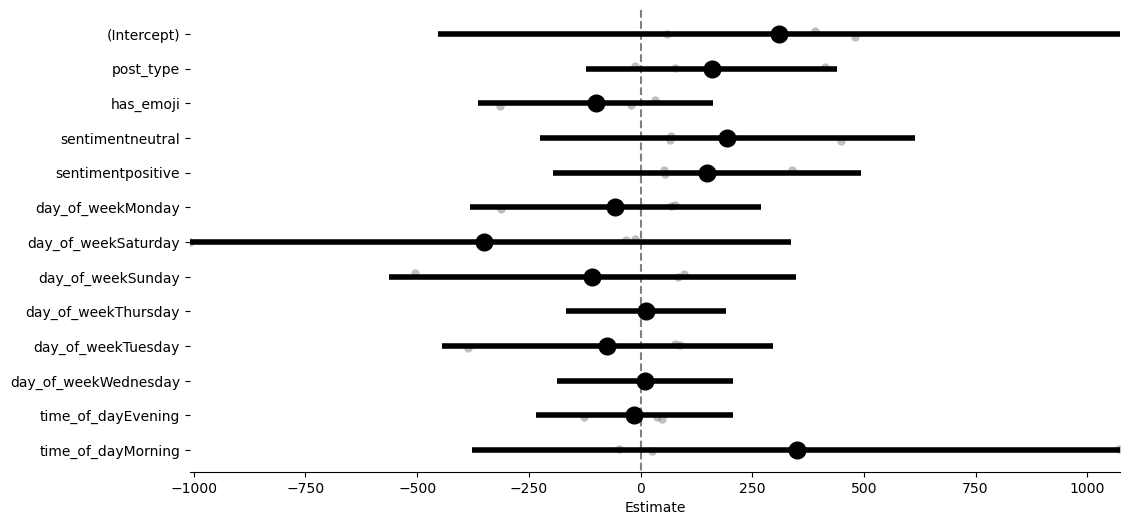

In [18]:
# Visualize coefficients with group/cluster fits overlaid ("forest plot")
model.plot_summary()

In [19]:
# Create a DataFrame to store the results
result_df = pd.DataFrame()

# Populate the DataFrame with fixed effects
result_df['Main effects Estimate'] = fixed_effects['Estimate'].values
result_df['SE'] = fixed_effects['SE'].values

# Populate the DataFrame with random effects
for group, effect in random_effects.items():
    result_df[f'Random effect {group}'] = effect

# Add Intercept row
result_df.loc['(Intercept)'] = [fixed_effects.loc['(Intercept)', 'Estimate'], fixed_effects.loc['(Intercept)', 'SE']] + [0] * (len(random_effects) - 1)

# Reorder columns
result_df = result_df[['Main effects Estimate', 'SE'] + [col for col in result_df.columns if col not in ['Main effects Estimate', 'SE']]]

# Print the results table
print(result_df)

ValueError: cannot set a row with mismatched columns

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("has_emoji", plot_ci=True, ylabel="predicted engagement")

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("post_type", plot_ci=True, ylabel="predicted engagement")

In [ ]:
# Plot coefficients for each group/cluster as separate regressions
model.plot("sentiment", plot_ci=True, ylabel="predicted engagement")

### 2.2 Interpretation of results

to be done

####
